In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
cats_many = len(os.listdir('../input/cat-and-dog/training_set/training_set/cats'))
dogs_many = len(os.listdir('../input/cat-and-dog/training_set/training_set/dogs'))
print(f'cats: {cats_many}\ndogs: {dogs_many}')

cats: 4001
dogs: 4006


In [4]:
from tqdm import tqdm

train_data_path = '../input/cat-and-dog/training_set/training_set/'
class_names = ['cats','dogs']
class_names.index('cats')

train_data = []

for c in class_names:
    class_path = os.path.join(train_data_path,c)
    class_num = class_names.index(c)
    
    for img in tqdm(os.listdir(class_path)):
        img_array = cv2.imread(os.path.join(class_path,img))
        
        train_data.append([img_array,class_num])

100%|██████████| 4006/4006 [00:39<00:00, 101.38it/s]


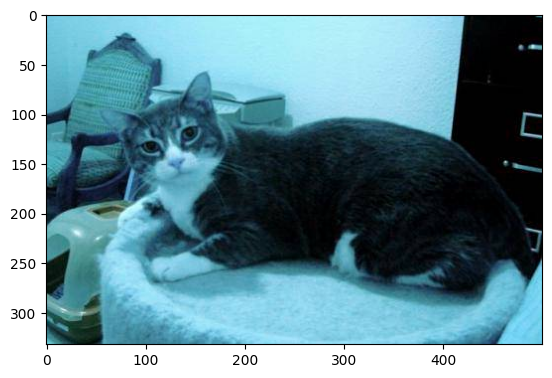

In [5]:
plt.imshow(train_data[0][0])
plt.show()

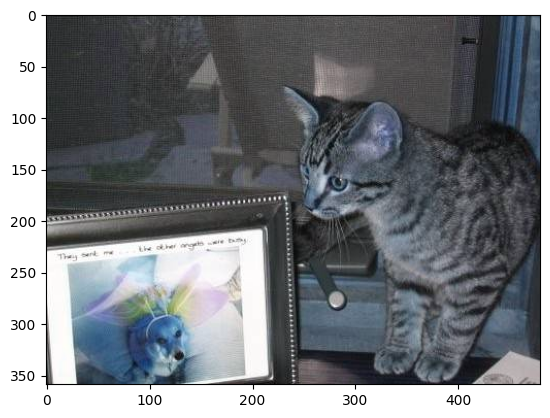

In [6]:
plt.imshow(train_data[3000][0])
plt.show()

In [7]:
train_data[3000][1]

0